<a href="https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Entrepreneurship in New Jersey, USA. 2019-2020

## Research Question:
How does the age of business influence job creation in New Jersey, USA? Period 2019-2020

## Hypothesis:
Younger companies (0-1 years) generate more jobs compared to older companies (11+ years).

## Variables:
Independent Variable: Age of the company (young vs. established).
Dependent variable: Proportion of jobs generated in the private sector.

## Analysis:
*   Calculation of the proportion of jobs created by young and established companies in each sector, in New Jersey, USA. Period 2019-2020
*   Descriptive statistics and correlation graphic analysis to evaluate the relationship between the average age of the company and the number of jobs generated.

## Description
The Entrepreneurial Jobs series provided by Kauffman Foundation (2025),are Indicators of Entrepreneurship that measures entrepreneurial trends in the United States.

To analyze the relationship between the age of companies and the proportion of jobs they generate, I use the variables found in the file:

## Variables from the Dataset

* fips: State FIPS code (34 for New Jersey).
* name: Name of the state (New Jersey).
* geo_level: Geographic level (S for state).
* year: Year of the data.
* demographic-type: Type of demographic classification (here "Age of Business", which indicates the age of the business).
* demographic-code: Numerical code for the age category of the business.
demographic: Age category of the business (Example: "Ages 0 to 1", "Ages 2 to 3", etc.).
* contribution: Contribution of this group to entrepreneurial jobs.
* compensation: Level of compensation (wages).
* constancy: Level of stability or retention of employment.
* creation: Job creation (change in jobs generated).

## Sources
Ewing Marion Kauffman Foundation. Kauffman Indicators of Entrepreneurship (2025)
https://indicators.kauffman.org/data-downloads


In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas


# Step 1. Download file from online and save in colab
> Data downloaded in cvs and previously cleaned, filtered only data from New Jersey. Saved to Google Drive. Database from https://indicators.kauffman.org/

https://drive.google.com/file/d/1tx7GCOli5WBul-Yz3gF9w7eZnIA30rs-/view?usp=sharing
1tx7GCOli5WBul-Yz3gF9w7eZnIA30rs-

Sources:
* Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY

* Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk


In [ ]:
#link from my drive, published: https://docs.google.com/spreadsheets/d/e/2PACX-1vRLyyJl7NSl3lyqR3tcRKaUljUukA0XpwsQXe3tTROPRx2zamZtqSrASf10eDQLPecEfyz-v9Dw4ItM/pub?gid=805463561&single=true&output=csv
import pandas as pd
eji_nj2001_2020 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRLyyJl7NSl3lyqR3tcRKaUljUukA0XpwsQXe3tTROPRx2zamZtqSrASf10eDQLPecEfyz-v9Dw4ItM/pub?gid=805463561&single=true&output=csv')


## Step 2. Read the first row and head of the dataframe, showing 1 to 5 entries.

In [ ]:
eji_nj2001_2020.head()

,fips,name,geo_level,year,demographic-type,demographic-code,demographic,contribution,compensation,constancy,creation
0,34,New Jersey,S,2001,Age of Business,1,Ages 0 to 1,0.037775,0.989571,0.535145,4.663433
1,34,New Jersey,S,2001,Age of Business,2,Ages 2 to 3,0.045582,1.008414,0.631253,-0.252688
2,34,New Jersey,S,2001,Age of Business,3,Ages 4 to 5,0.048891,1.085714,0.667015,-0.543881
3,34,New Jersey,S,2001,Age of Business,4,Ages 6 to 10,0.112037,1.112621,0.652145,-2.259242
4,34,New Jersey,S,2001,Age of Business,5,Ages 11+,0.755715,1.271253,0.743614,-6.306614


# Step 3. Dataset content

In [ ]:
eji_nj2001_2020.tail()

#Explanation
#Creation= Number of net new jobs created at firms aged 0-1 year old per 1,000 people
#Creation, measured as net new job change per 1,000 people, reflects the increase or decrease in the number of jobs created in a specific geography by a particular firm age group. Here, a positive value for creation indicates that more jobs are created than lost at firms 0-1 year old in the specific geographic area while a negative value indicates more job losses than job gains.


,fips,name,geo_level,year,demographic-type,demographic-code,demographic,contribution,compensation,constancy,creation
95,34,New Jersey,S,2020,Age of Business,1,Ages 0 to 1,0.029172,0.659691,0.515544,3.952211
96,34,New Jersey,S,2020,Age of Business,2,Ages 2 to 3,0.034736,0.724328,0.605335,-1.046230
97,34,New Jersey,S,2020,Age of Business,3,Ages 4 to 5,0.033484,0.713864,0.615539,-1.253156
98,34,New Jersey,S,2020,Age of Business,4,Ages 6 to 10,0.079645,0.799730,0.645814,-2.453512
99,34,New Jersey,S,2020,Age of Business,5,Ages 11+,0.822962,1.248736,0.762463,-25.838034


In [ ]:
eji_nj2001_2020.columns #list var names

Index(['fips', 'name', 'geo_level', 'year', 'demographic-type',
       'demographic-code', 'demographic', 'contribution', 'compensation',
       'constancy', 'creation'],
      dtype='object')

In [ ]:
eji_nj2001_2020.head(2)
eji_nj2001_2020.tail(2)

,fips,name,geo_level,year,demographic-type,demographic-code,demographic,contribution,compensation,constancy,creation
0,34,New Jersey,S,2001,Age of Business,1,Ages 0 to 1,0.037775,0.989571,0.535145,4.663433
1,34,New Jersey,S,2001,Age of Business,2,Ages 2 to 3,0.045582,1.008414,0.631253,-0.252688


,fips,name,geo_level,year,demographic-type,demographic-code,demographic,contribution,compensation,constancy,creation
98,34,New Jersey,S,2020,Age of Business,4,Ages 6 to 10,0.079645,0.799730,0.645814,-2.453512
99,34,New Jersey,S,2020,Age of Business,5,Ages 11+,0.822962,1.248736,0.762463,-25.838034


In [ ]:
eji_nj2001_2020["demographic"][0:5] #subset or slice

,demographic
0,Ages 0 to 1
1,Ages 2 to 3
2,Ages 4 to 5
3,Ages 6 to 10
4,Ages 11+


In [ ]:
eji_nj2001_2020[["year","demographic","creation"]][0:5] #subset or slice



,year,demographic,creation
0,2001,Ages 0 to 1,4.663433
1,2001,Ages 2 to 3,-0.252688
2,2001,Ages 4 to 5,-0.543881
3,2001,Ages 6 to 10,-2.259242
4,2001,Ages 11+,-6.306614


# Step 4. Data cleaning and Descriptive Statistics

Mean, Median, Mode and Standard Deviation

Dependent variable: Proportion of jobs generated in the private sector.

In [ ]:
# median, mode, stdev
eji_nj2001_2020["creation"].mean()

-0.020869033039999964

In [ ]:
eji_nj2001_2020["creation"].median()

-0.004331364

In [ ]:
eji_nj2001_2020["creation"].mode()

,creation
0,-25.838034
1,-14.199823
2,-13.480747
3,-6.306614
4,-6.050642
...,...
95,5.593373
96,5.731679
97,6.402712
98,7.758114


In [ ]:
eji_nj2001_2020["creation"].std()

4.353490049998097

Frequency table

Independent Variable: Age of the company (young vs. established).

Source: ChatGpt, code for frequency table and graphics

In [ ]:
# Filter data for the years 2019 and 2020
eji_nj2001_2020_freq = eji_nj2001_2020_filtered[eji_nj2001_2020_filtered['year'].between(2019, 2020)]

# Create a frequency table to measure the number of jobs for each year and type of company age
employment_table = eji_nj2001_2020_freq.groupby(['year', 'demographic'])['creation'].sum().reset_index()

# Show frequency table
print("Frequency table of jobs for each year and type of company age:")
print(employment_table)

# Views
plt.figure(figsize=(12, 6))
sns

Frequency table of jobs for each year and type of company age:
   year   demographic   creation
0  2019   Ages 0 to 1   5.428841
1  2019      Ages 11+  -0.588931
2  2019   Ages 2 to 3   0.579812
3  2019   Ages 4 to 5   0.174056
4  2019  Ages 6 to 10   0.201527
5  2020   Ages 0 to 1   3.952211
6  2020      Ages 11+ -25.838034
7  2020   Ages 2 to 3  -1.046230
8  2020   Ages 4 to 5  -1.253156
9  2020  Ages 6 to 10  -2.453512


<Figure size 960x480 with 0 Axes>

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

<Figure size 960x480 with 0 Axes>

<Axes: xlabel='demographic', ylabel='creation'>

Text(0.5, 1.0, 'Job creation by type of firm age in 2019')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Ages 0 to 1'),
  Text(1, 0, 'Ages 11+'),
  Text(2, 0, 'Ages 2 to 3'),
  Text(3, 0, 'Ages 4 to 5'),
  Text(4, 0, 'Ages 6 to 10')])

Text(0, 0.5, 'Number of jobs')

Text(0.5, 0, 'Firm age')

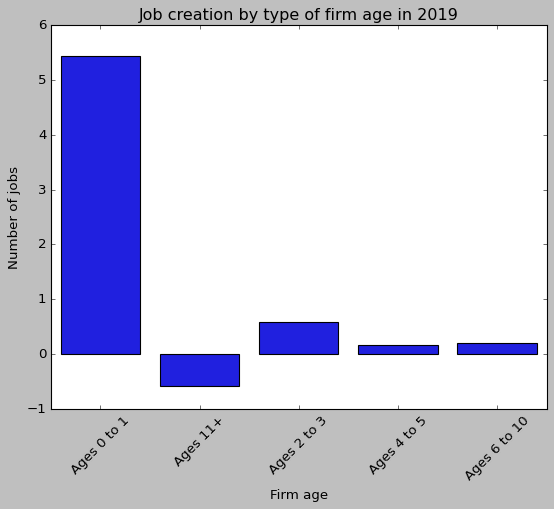

In [ ]:
# GRAPHICS 2019

eji_nj2001_2020_2019 = employment_table[employment_table['year'] == 2019]
sns.barplot(data=eji_nj2001_2020_2019, x='demographic', y='creation')
plt.title("Job creation by type of firm age in 2019")
plt.xticks(rotation=45)
plt.ylabel("Number of jobs")
plt.xlabel("Firm age")
plt.show()

<Figure size 960x480 with 0 Axes>

<Axes: xlabel='demographic', ylabel='creation'>

Text(0.5, 1.0, 'Job creation by type of firm age in 2020')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Ages 0 to 1'),
  Text(1, 0, 'Ages 11+'),
  Text(2, 0, 'Ages 2 to 3'),
  Text(3, 0, 'Ages 4 to 5'),
  Text(4, 0, 'Ages 6 to 10')])

Text(0, 0.5, 'Number of jobs')

Text(0.5, 0, 'Firm age')

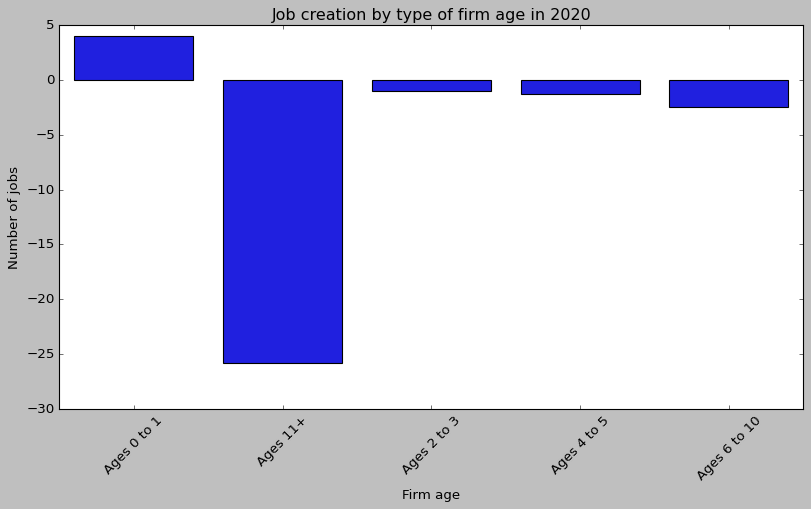

In [ ]:
# GRAPHICS 2020
plt.figure(figsize=(12, 6))
eji_nj2001_2020_2020 = employment_table[employment_table['year'] == 2020]
sns.barplot(data=eji_nj2001_2020_2020, x='demographic', y='creation')
plt.title("Job creation by type of firm age in 2020")
plt.xticks(rotation=45)
plt.ylabel("Number of jobs")
plt.xlabel("Firm age")
plt.show()


Explanation

Conclusion on the effect of the existence of companies at different ages and Job Creation in New Jersey (2019-2020)
* Significant decrease in employment in New Jersey in 2020, probably due to the pandemic period, with negative values ​​in almost all age groups of companies.

* It should be noted that in 2019, almost all age groups of companies showed positive values ​​in terms of net job creation in New Jersey, except older companies.

* Regarding the age of companies, it is observed that there is a negative impact of older companies (more than 11 years) on the level of employment, both in 2019 (small ones loss of -0.58) and accentuated in 2020, as it was -25.83. Which suggests that more established companies suffered a much greater impact.

A priori, it can be concluded that in the long term, older companies reduce net employment to a greater extent, and those companies at an early age, even if their participation in the labor market is very small, have an easier time generating employment and resisting pandemics (Young companies aged 0-1 years).

OBS.: Creation= Number of net new jobs created at firms aged 0-1 year old per 1,000 people

# Therefore, we will proceed to analyze young companies.

Table of jobs created by companies with category 'Ages 0 to 1':
   year  creation
0  2019  5.428841
1  2020  3.952211


<Figure size 640x400 with 0 Axes>

<Axes: xlabel='year', ylabel='creation'>

Text(0.5, 1.0, "Table of jobs created by companies with category 'Ages 0 to 1' (2019-2020)")

Text(0, 0.5, 'Number of jobs')

Text(0.5, 0, 'Year')

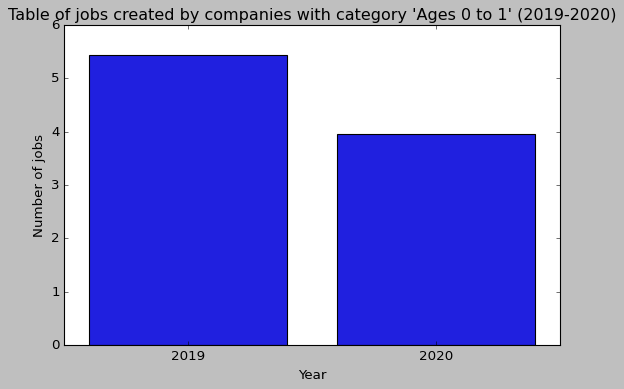

In [ ]:
# Filter per  demographic
selected_demographic = "Ages 0 to 1"
eji_nj2001_2020_filtered = eji_nj2001_2020[(eji_nj2001_2020['demographic'] == selected_demographic) & (eji_nj2001_2020['year'].between(2019, 2020))]

# Frequency table
employment_table = eji_nj2001_2020_filtered.groupby(['year'])['creation'].sum().reset_index()
print(f"Table of jobs created by companies with category '{selected_demographic}':")
print(employment_table)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=employment_table, x='year', y='creation')
plt.title(f"Table of jobs created by companies with category '{selected_demographic}' (2019-2020)")
plt.ylabel("Number of jobs")
plt.xlabel("Year")
plt.show()

Young companies (Ages 0 to 1) continued to generate employment in 2020 (3.95), although in smaller numbers than in 2019 (5.42).
This reinforces the hypothesis that new businesses tend to be more dynamic in generating employment, although they may also be more vulnerable in the long term.

### More statistics, dataset from 2001 to 2020

# Job creation by firms of all age categories, from 2001 to 2020

Sources:
* https://github.com/theaok/vis/blob/main/all.ipynb
* ChatGpt
* https://pandas.pydata.org/


# Scatter plot, 2001 to 2020

Net job creation by all firms of all ages, over the period 2001 to 2020, where 2001=1 and 2020=20.

A constant trend is observed over time, which would indicate that firms maintain their level of net job creation over time.

<Axes: xlabel='year', ylabel='creation'>

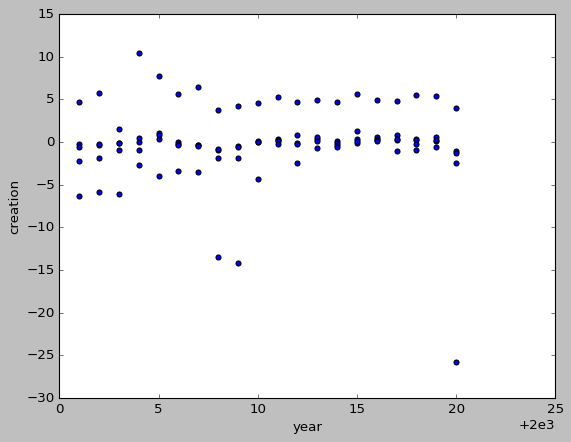

In [ ]:
eji_nj2001_2020.plot(kind='scatter', y='creation', x='year')

<Figure size 800x480 with 0 Axes>

<Axes: xlabel='year', ylabel='creation'>

([<matplotlib.axis.XTick at 0x7a4a27beea50>,
 [Text(2001, 0, '1'),
  Text(2002, 0, '2'),
  Text(2003, 0, '3'),
  Text(2004, 0, '4'),
  Text(2005, 0, '5'),
  Text(2006, 0, '6'),
  Text(2007, 0, '7'),
  Text(2008, 0, '8'),
  Text(2009, 0, '9'),
  Text(2010, 0, '10'),
  Text(2011, 0, '11'),
  Text(2012, 0, '12'),
  Text(2013, 0, '13'),
  Text(2014, 0, '14'),
  Text(2015, 0, '15'),
  Text(2016, 0, '16'),
  Text(2017, 0, '17'),
  Text(2018, 0, '18'),
  Text(2019, 0, '19'),
  Text(2020, 0, '20')])

Text(0.5, 1.0, "Scatterplot: Job creation by firms with category 'Ages 0 to 1' (2001-2020)")

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of jobs')

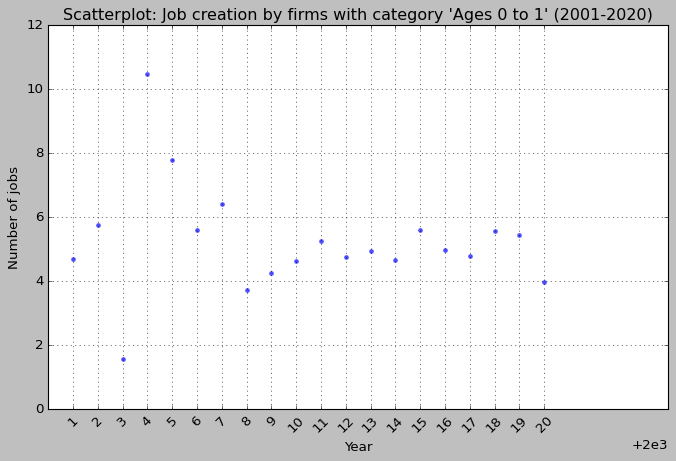

In [ ]:
df_scatter = eji_nj2001_2020[(eji_nj2001_2020['demographic'] == selected_demographic) & (eji_nj2001_2020['year'].between(2001, 2020))]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='year', y='creation', alpha=0.7)
plt.xticks(ticks=df_scatter['year'].unique(), rotation=45)  # Ajustar etiquetas del eje X
plt.title(f"Scatterplot: Job creation by firms with category '{selected_demographic}' (2001-2020)")
plt.xlabel("Year")
plt.ylabel("Number of jobs")
plt.grid(True)
plt.show()

Scatter plot> Net job creation by firms aged 0 to 1 year, during the period 2001 to 2020, where 2001=1 and 2020=20.
A trendless dispersion is observed during the period 2001 to 2007, and a constant trend from 2008 onwards, which would indicate that firms maintain their level of net job creation over time.

# Correlation between variables

In [ ]:
#Correlation

eji_nj2001_2020[['creation','contribution']].corr().round(2)
eji_nj2001_2020[['creation','compensation']].corr().round(2)
eji_nj2001_2020[['creation','constancy']].corr().round(2)
eji_nj2001_2020[['creation','creation']].corr().round(2)
#Variables to test correlations
#contribution: Contribution of this group to entrepreneurial jobs.
#compensation: Level of compensation (wages).
#constancy: Level of stability or retention of employment.
#creation: Job creation (change in jobs generated).


,creation,contribution
creation,1.00,-0.57
contribution,-0.57,1.00


,creation,compensation
creation,1.00,-0.59
compensation,-0.59,1.00


,creation,constancy
creation,1.0,-0.7
constancy,-0.7,1.0


,creation,creation
creation,1.0,1.0
creation,1.0,1.0


In [ ]:
## DATA CLEANING
# Review general information about the dataset
eji_nj2001_2020.info()

# Check for null values
eji_nj2001_2020.isnull().sum()

# Filter relevant data (keep only necessary variables)
eji_nj2001_2020_filtered = eji_nj2001_2020[['year', 'demographic', 'creation', 'compensation', 'constancy']]

## DESCRIPTIVE STATISTICS
print("Descriptive Statistics:")
print(eji_nj2001_2020_filtered.describe())

## VISUALIZATIONS
plt.figure(figsize=(12, 6))
sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fips              100 non-null    int64  
 1   name              100 non-null    object 
 2   geo_level         100 non-null    object 
 3   year              100 non-null    int64  
 4   demographic-type  100 non-null    object 
 5   demographic-code  100 non-null    int64  
 6   demographic       100 non-null    object 
 7   contribution      100 non-null    float64
 8   compensation      100 non-null    float64
 9   constancy         100 non-null    float64
 10  creation          100 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.7+ KB


,0
fips,0
name,0
geo_level,0
year,0
demographic-type,0
demographic-code,0
demographic,0
contribution,0
compensation,0
constancy,0


Descriptive Statistics:
              year    creation  compensation   constancy
count   100.000000  100.000000    100.000000  100.000000
mean   2010.500000   -0.020869      0.917013    0.660242
std       5.795331    4.353490      0.220184    0.081713
min    2001.000000  -25.838034      0.630949    0.461664
25%    2005.750000   -0.744167      0.743450    0.621623
50%    2010.500000   -0.004331      0.847327    0.657370
75%    2015.250000    0.672164      1.081820    0.708476
max    2020.000000   10.467469      1.305977    0.806479


<Figure size 960x480 with 0 Axes>

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

<Figure size 960x480 with 0 Axes>

# Conclusion

The 2020 crisis had a strong impact on job creation, affecting established companies (Ages 11+) the most. In contrast, young companies (0-1 years) continued to create jobs, although to a lesser extent.

# Outputs

* New companies are more flexible and adapt better to changes.
* Established companies have more fixed costs and were more affected by the pandemic.

There are also correlations with other variables> Job creation shows a negative correlation with:

* Contribution to employment (-0.57): sectors with a greater impact on employment do not necessarily create more new jobs.
* Compensation (-0.59): sectors with higher salaries generate fewer new jobs.
* Job stability (-0.70): companies with higher employee retention have lower job creation.

References
* Ewing Marion Kauffman Foundation. Kauffman Indicators of Entrepreneurship (2025) https://indicators.kauffman.org/data-downloads
* https://github.com/theaok/vis/blob/main/all.ipynb
* ChatGpt
* Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY
* Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk
